In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
import pandas as pd

# 定义文件路径
file_path = "../data/data_24-12-11-13-41.csv"

# 使用pandas读取CSV文件
try:
    df = pd.read_csv(file_path)
    
    # 显示前几行以检查数据是否正确加载
    print("Data has been loaded successfully.")
    print(df.head())
except FileNotFoundError:
    print(f"The file at {file_path} was not found.")
except pd.errors.EmptyDataError:
    print("The file is empty.")
except pd.errors.ParserError:
    print("Parse error occurred while reading the file.")


# colors = ['red', 'green', 'orange', 'purple', 'brown']
colors = {'3':'red', '5': (204/255, 124/255, 113/255), '9': 'orange', '13': 'purple'}


Data has been loaded successfully.
   Samples  Theory_n=4  FCS_n=4_mean  FCS_n=4_var  Theory_n=8  FCS_n=8_mean  \
0   4096.0   -0.950000     -0.923000     0.015430   -0.109900     -0.019730   
1   8192.0   -0.584961     -0.577637     0.010109    0.056488      0.049957   
2  16384.0    0.844238      0.851562     0.005032   -0.015511     -0.005669   
3  32768.0    0.046204      0.056427     0.003405    0.258545      0.264404   
4      inf   -0.674805     -0.682129     0.004631    0.170044      0.171509   

   FCS_n=8_var  Theory_n=10  FCS_n=10_mean  FCS_n=10_var  ...  \
0     0.046540    -0.185800      -0.138100      0.050260  ...   
1     0.031311    -0.024155      -0.041321      0.043274  ...   
2     0.013596     0.116638       0.086792      0.018158  ...   
3     0.009338     0.119141       0.115112      0.007210  ...   
4     0.003983     0.065125       0.071960      0.003223  ...   

   ADFCS_n=10_d=13_mean  ADFCS_n=10_d=13_var  ADFCS_n=12_d=3_mean  \
0             -0.150800       

In [3]:
def plot_theory_vs_fcs_adfcs(df, n):
    # 正则表达式模式匹配
    theory_pattern = re.compile(r'Theory_n=' + str(n))
    fcs_mean_pattern = re.compile(r'FCS_n=' + str(n) + r'_mean')
    adfcs_mean_pattern = re.compile(r'ADFCS_n=' + str(n) + r'_d=(\d+)_mean')

    # 提取数据
    samples = df['Samples'].values
    
    theory_col = next((col for col in df.columns if theory_pattern.match(col)), None)
    fcs_mean_col = next((col for col in df.columns if fcs_mean_pattern.match(col)), None)
    
    adfcs_mean_cols = [col for col in df.columns if adfcs_mean_pattern.match(col)]

    if not theory_col or not fcs_mean_col:
        print(f"Columns for n={n} not found.")
        return

    # 创建图表
    plt.figure(figsize=(10, 6))

    # 基准线
    plt.axhline(y=0, color='black', linestyle='-', linewidth=2, label='Theory Baseline')

    # plt.plot(samples, df[theory_col], label='Theory', marker='o', linestyle='--')
    fcs_diff = df[fcs_mean_col] - df[theory_col]
    # fcs_diff = df[fcs_mean_col]
    plt.plot(samples, fcs_diff, label='FCS_mean - Theory', marker='x', color = (126/255,153/255,244/255))

    # 计算并绘制ADFCS_mean与Theory的差值曲线（对于不同的d）
    for col in adfcs_mean_cols:
        d = re.search(r'd=(\d+)_mean', col).group(1)
        # adfcs_diff = df[col]
        adfcs_diff = df[col] - df[theory_col]
        plt.plot(samples, adfcs_diff, label=f'ADFCS_d={d}_mean - Theory', linestyle='--', color = colors[i])

    # 设置图表属性
    plt.title(f'The difference between Theory vs FCS and ADFCS means for n={n}')
    plt.xlabel('Samples')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)

    # 显示图表
    plt.show()

# 假设 df 是你的 DataFrame
# 使用示例：plot_theory_vs_fcs_adfcs(df, 4)

NameError: name 'i' is not defined

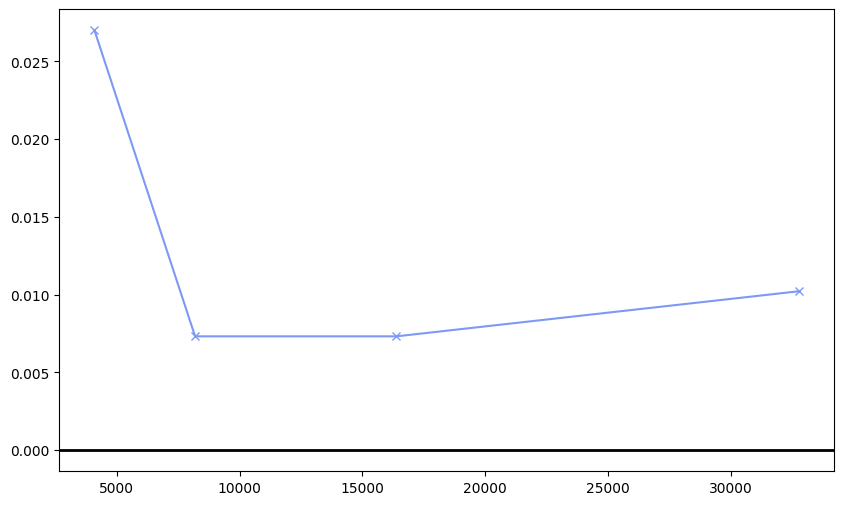

In [4]:
plot_theory_vs_fcs_adfcs(df, 4)

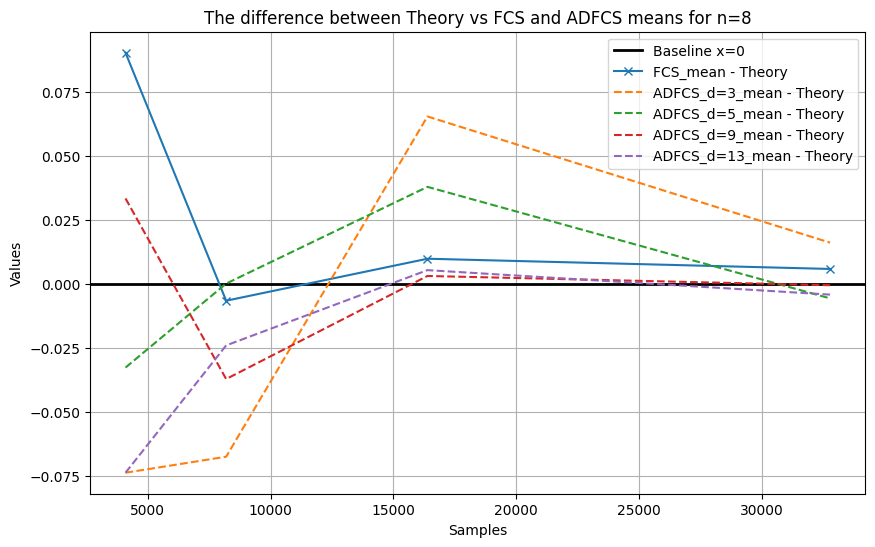

In [27]:
plot_theory_vs_fcs_adfcs(df, 8)

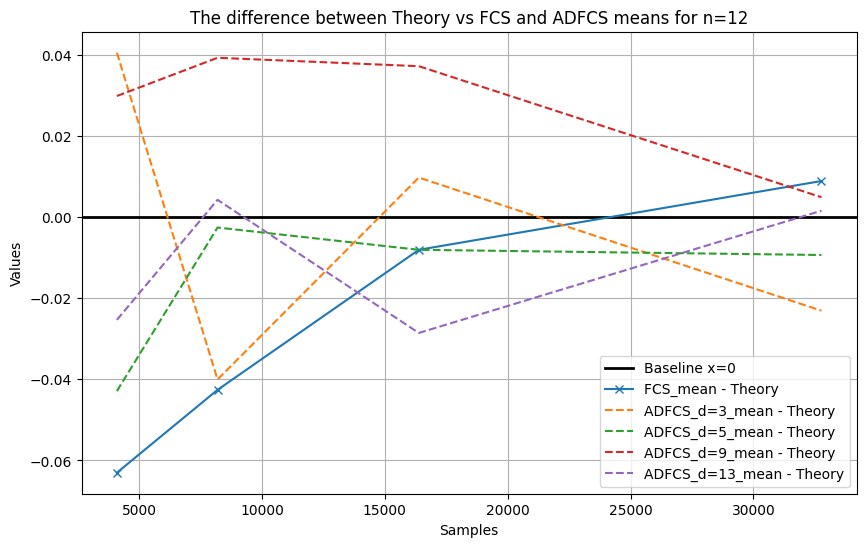

In [28]:
plot_theory_vs_fcs_adfcs(df, 12)

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np



def plot_theory_vs_fcs_adfcs_var(df, n):
    # 正则表达式模式匹配
    theory_pattern = re.compile(r'Theory_n=' + str(n))
    fcs_mean_pattern = re.compile(r'FCS_n=' + str(n) + r'_mean')
    fcs_var_pattern = re.compile(r'FCS_n=' + str(n) + r'_var')
    adfcs_pattern = re.compile(r'ADFCS_n=' + str(n) + r'_d=(\d+)_(mean|var)')

    # 提取数据
    samples = [4096, 8192, 16384, 32768, 65536 ]
    
    theory_col = next((col for col in df.columns if theory_pattern.match(col)), None)
    fcs_mean_col = next((col for col in df.columns if fcs_mean_pattern.match(col)), None)
    fcs_var_col = next((col for col in df.columns if fcs_var_pattern.match(col)), None)

    # 分别收集ADFCS的均值和方差列
    adfcs_mean_cols = {}
    adfcs_var_cols = {}

    for col in df.columns:
        match = adfcs_pattern.match(col)
        if match:
            d, stat_type = match.groups()
            if stat_type == 'mean':
                adfcs_mean_cols[d] = col
            elif stat_type == 'var':
                adfcs_var_cols[d] = col

    if not theory_col or not fcs_mean_col or not fcs_var_col:
        print(f"Columns for n={n} not found.")
        return

    # 创建图表
    plt.figure(figsize=(10, 6))

    # 基准线
    plt.axhline(y=0, color='black', linestyle='-', linewidth=2, label='Theory baseline')

    squeeze_fill = 120
    # 计算并绘制FCS_mean与Theory的差值曲线，并加上方差阴影区
    # fcs_diff = df[fcs_mean_col] - df[theory_col]
    fcs_diff = list(map(abs, df[fcs_mean_col] - df[theory_col]) )
    # fcs_var = df[fcs_var_col]/squeeze_fill
    plt.plot(samples, fcs_diff, label='FCS', marker = 'x', color=(126/255, 153/255, 244/255), lw = 4)
    # plt.fill_between(samples, fcs_diff - np.sqrt(fcs_var), fcs_diff + np.sqrt(fcs_var),
    #                  color=(126/255, 153/255, 244/255), alpha=0.2, edgecolor='none')  # 移除阴影区域的描边

    # 计算并绘制ADFCS_mean与Theory的差值曲线（对于不同的d），并加上方差阴影区
    datas = set(adfcs_mean_cols).intersection(adfcs_var_cols)
    for i,d in enumerate(datas):  # 只处理既有均值又有方差的d
        print(i,d)
        mean_col = adfcs_mean_cols[d]
        var_col = adfcs_var_cols[d]
        
        # adfcs_diff = df[mean_col] - df[theory_col]
        adfcs_diff = list(map(abs, df[mean_col] - df[theory_col]) )
        # adfcs_var = df[var_col]/squeeze_fill

        # print(d, f"{int(d)==5}", type(d))
        if int(d)==5:
            plt.plot(samples, adfcs_diff, label=f'd = {d}', linestyle='-.', color=colors[d], marker = 'o', lw = 4)
            # plt.fill_between(samples, adfcs_diff - np.sqrt(adfcs_var), adfcs_diff + np.sqrt(adfcs_var),
            #                 color=colors[d], alpha=0.15, edgecolor='none')  # 移除阴影区域的描边
        else:
            plt.plot(samples, adfcs_diff, label=f'd = {d}', linestyle=':', color=colors[d], alpha = 0.4, lw = 2)

    # 设置图表属性
    plt.xscale('log', base = 2)
    # plt.title(f'Smulation of FCS vs ADFCS for Kiteav chain')
    plt.xlabel('Samples', fontsize=20)
    plt.ylabel('Estimation error', fontsize=18)
    
    # 获取当前轴
    ax = plt.gca()
    # 移除阴影区域的图例
    handles, labels = ax.get_legend_handles_labels()
    new_handles = [h for h, l in zip(handles, labels) if not isinstance(h, plt.Polygon)]
    new_labels = [l for h, l in zip(handles, labels) if not isinstance(h, plt.Polygon)]
    plt.legend(new_handles, new_labels, bbox_to_anchor=(1,0), loc='lower right')

    # 调整布局以防止图例溢出
    # plt.tight_layout()
    # Smulation of FCS vs ADFCS for Kiteav chain
    # 显示图表
    plt.savefig('difference.svg', format='svg', dpi=1200)
    plt.show()

# 假设 df 是你的 DataFrame
# 使用示例：plot_theory_vs_fcs_adfcs(df, 4)

In [134]:
def plot_theory_vs_fcs_adfcs_mean(df, n):
    # 正则表达式模式匹配
    theory_pattern = re.compile(r'Theory_n=' + str(n))
    fcs_mean_pattern = re.compile(r'FCS_n=' + str(n) + r'_mean')
    fcs_var_pattern = re.compile(r'FCS_n=' + str(n) + r'_var')
    adfcs_pattern = re.compile(r'ADFCS_n=' + str(n) + r'_d=(\d+)_(mean|var)')

    # 提取数据
    samples = [4096, 8192, 16384, 32768, 65536 ]
    
    theory_col = next((col for col in df.columns if theory_pattern.match(col)), None)
    fcs_mean_col = next((col for col in df.columns if fcs_mean_pattern.match(col)), None)
    fcs_var_col = next((col for col in df.columns if fcs_var_pattern.match(col)), None)

    # 分别收集ADFCS的均值和方差列
    adfcs_mean_cols = {}
    adfcs_var_cols = {}

    for col in df.columns:
        match = adfcs_pattern.match(col)
        if match:
            d, stat_type = match.groups()
            if stat_type == 'mean':
                adfcs_mean_cols[d] = col
            elif stat_type == 'var':
                adfcs_var_cols[d] = col

    if not theory_col or not fcs_mean_col or not fcs_var_col:
        print(f"Columns for n={n} not found.")
        return

    # 创建图表
    plt.figure(figsize=(10, 6))

    # 基准线
    # plt.axhline(y=0, color='black', linestyle='-', linewidth=2, label='Theory Baseline')

    plt.plot(samples, df[theory_col], color = "black", lw = 3, label = 'Theory Baseline')

    # fcs_diff = df[fcs_mean_col] - df[theory_col]
    fcs_diff = df[fcs_mean_col]
    fcs_var = df[fcs_var_col]
    var_col = adfcs_var_cols[d]
    adfcs_var = df[var_col]
    plt.plot(samples, fcs_diff, color = (126/255,153/255,244/255), lw = 3, label = "FCS")
    # plt.fill_between(samples, fcs_diff - fcs_var, fcs_diff + fcs_var,
    #                  color=(126/255, 153/255, 244/255), alpha=0.2, edgecolor='none')  # 移除阴影区域的描边

    # 计算并绘制ADFCS_mean与Theory的差值曲线（对于不同的d）
    datas = set(adfcs_mean_cols).intersection(adfcs_var_cols)
    for i,d in enumerate(datas):  # 只处理既有均值又有方差的d
    # for i,col in enumerate(adfcs_mean_cols):
        mean_col = adfcs_mean_cols[d]
        var_col = adfcs_var_cols[d]
        # d = re.search(r'd=(\d+)_mean', col).group(1)
        # print(d, f"{type(d)}")
        adfcs_diff = df[mean_col]
        adfcs_var = df[var_col]
        # adfcs_diff = df[col] - df[theory_col]
        # plt.plot(samples, adfcs_diff, linestyle='-.', color = colors[d], lw = 3, label = f'd = {d}')

        if int(d)==5 == 5:
            plt.plot(samples, adfcs_diff, linestyle='-.', color = colors[d], lw = 3, label = f'd = {d}')
            # plt.fill_between(samples, adfcs_diff - adfcs_var, adfcs_diff + adfcs_var,
            #                 color=colors[d], alpha=0.25, edgecolor='none')  # 移除阴影区域的描边
        else:
            plt.plot(samples, adfcs_diff, linestyle=':', color = colors[d], lw = 1.5, label = f'd = {d}')

    # for i,d in enumerate(datas):  # 只处理既有均值又有方差的d
    #     # print(i,d)
    #     mean_col = adfcs_mean_cols[d]
    #     var_col = adfcs_var_cols[d]
        
    #     # adfcs_diff = df[mean_col] - df[theory_col]
    #     adfcs_diff = list(map(abs, df[mean_col] - df[theory_col]) )
    #     # adfcs_var = df[var_col]/squeeze_fill

    #     # print(d, f"{int(d)==5}", type(d))
    #     if int(d)==5 == 5:
    #         plt.plot(samples, adfcs_diff, label=f'd = {d}', linestyle='-.', color=colors[d], marker = 'o', lw = 3)
    #         # plt.fill_between(samples, adfcs_diff - np.sqrt(adfcs_var), adfcs_diff + np.sqrt(adfcs_var),
    #         #                 color=colors[d], alpha=0.15, edgecolor='none')  # 移除阴影区域的描边
    #     else:
    #         plt.plot(samples, adfcs_diff, label=f'd = {d}', linestyle=':', color=colors[d], alpha = 0.4, lw = 2)



    # 设置图表属性
    # plt.title(f'Smulation of FCS vs ADFCS for Kiteav chain')
    plt.xscale('log', base = 2)
    plt.xlabel('Samples' ,fontsize=20)
    plt.ylabel('Estimation', fontsize=18)
    # plt.grid(False)
    plt.legend()
    plt.savefig('expval.svg', format='svg', dpi=1200)
    # 显示图表
    plt.show()

# 假设 df 是你的 DataFrame
# 使用示例：plot_theory_vs_fcs_adfcs(df, 4)

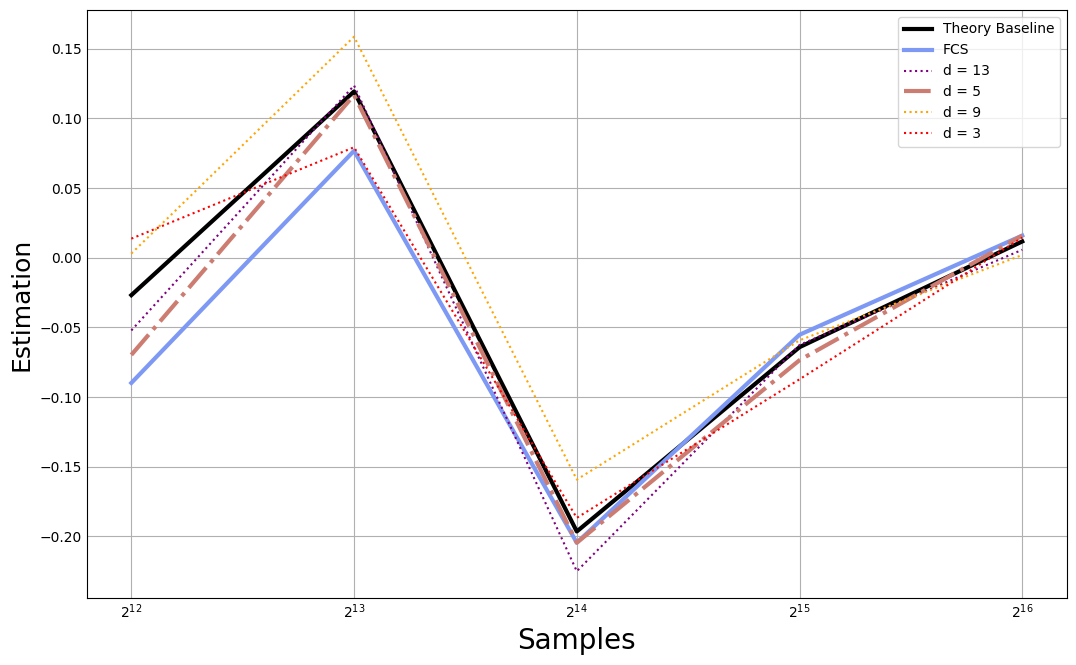

In [135]:
plot_theory_vs_fcs_adfcs_mean(df,12)

0 13
1 5
2 9
3 3


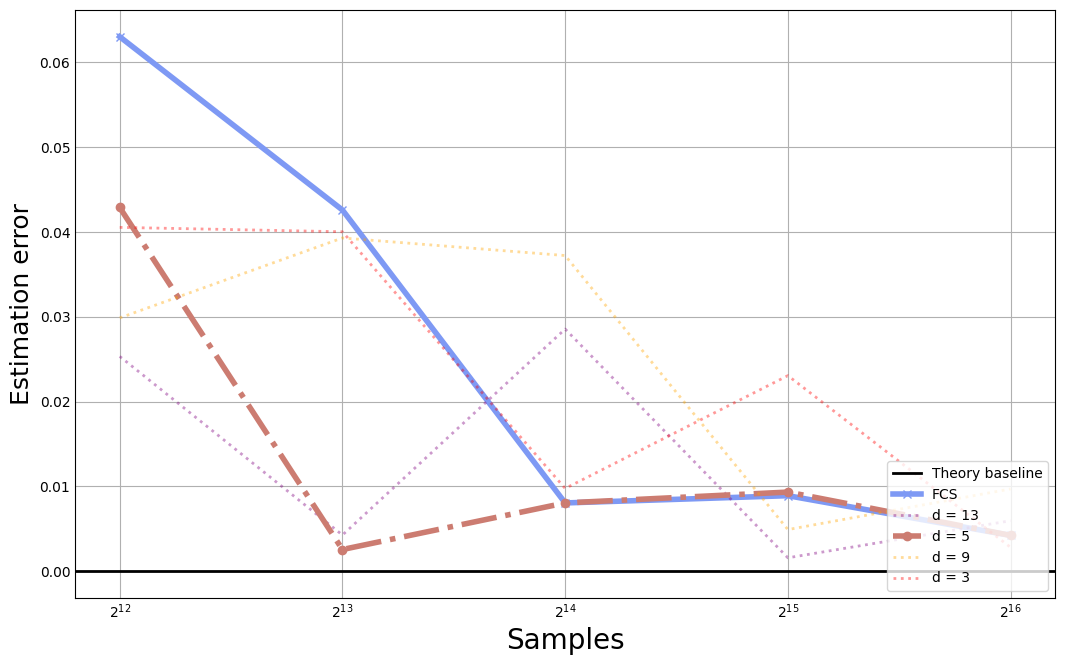

In [136]:
plot_theory_vs_fcs_adfcs_var(df, 12)

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np



def plot_theory_vs_fcs_adfcs_var_bar(df, n):
    # 正则表达式模式匹配
    theory_pattern = re.compile(r'Theory_n=' + str(n))
    fcs_mean_pattern = re.compile(r'FCS_n=' + str(n) + r'_mean')
    fcs_var_pattern = re.compile(r'FCS_n=' + str(n) + r'_var')
    adfcs_pattern = re.compile(r'ADFCS_n=' + str(n) + r'_d=(\d+)_(mean|var)')

    # 提取数据
    samples = df['Samples'].values
    
    theory_col = next((col for col in df.columns if theory_pattern.match(col)), None)
    fcs_mean_col = next((col for col in df.columns if fcs_mean_pattern.match(col)), None)
    fcs_var_col = next((col for col in df.columns if fcs_var_pattern.match(col)), None)

    # 分别收集ADFCS的均值和方差列
    adfcs_mean_cols = {}
    adfcs_var_cols = {}

    for col in df.columns:
        match = adfcs_pattern.match(col)
        if match:
            d, stat_type = match.groups()
            if stat_type == 'mean':
                adfcs_mean_cols[d] = col
            elif stat_type == 'var':
                adfcs_var_cols[d] = col

    if not theory_col or not fcs_mean_col or not fcs_var_col:
        print(f"Columns for n={n} not found.")
        return

    # 创建图表
    plt.figure(figsize=(10, 6))

    # 基准线
    # plt.axhline(y=0, color='black', linestyle='-', linewidth=2, label='Theory baseline')

    squeeze_fill = 120
    # 计算并绘制FCS_mean与Theory的差值曲线，并加上方差阴影区
    # fcs_diff = np.abs(df[fcs_mean_col] - df[theory_col])
    fcs_diff = list(map(abs, df[fcs_mean_col] - df[theory_col]) )
    fcs_var = df[fcs_var_col]/squeeze_fill
    print(fcs_diff)
    # print(np.array(fcs_var))
    plt.bar(samples, fcs_diff)
    # plt.bar(samples, fcs_diff, label='FCS', yerr=np.array(fcs_var), color=(126/255, 153/255, 244/255))
    # plt.fill_between(samples, fcs_diff - np.sqrt(fcs_var), fcs_diff + np.sqrt(fcs_var),
                    #  color=(126/255, 153/255, 244/255), alpha=0.2, edgecolor='none')  # 移除阴影区域的描边

    # 计算并绘制ADFCS_mean与Theory的差值曲线（对于不同的d），并加上方差阴影区
    # datas = set(adfcs_mean_cols).intersection(adfcs_var_cols)
    # for i,d in enumerate(datas):  # 只处理既有均值又有方差的d
    #     mean_col = adfcs_mean_cols[d]
    #     var_col = adfcs_var_cols[d]
    #     adfcs_diff = df[mean_col] - df[theory_col]
    #     adfcs_var = df[var_col]/squeeze_fill

    #     # print(d, f"{int(d)==5}", type(d))
    #     if int(d)==5 == 5:
    #         plt.plot(samples, adfcs_diff, label=f'd = {d}', linestyle='-.', color=colors[d], marker = 'o')
    #         plt.fill_between(samples, adfcs_diff - np.sqrt(adfcs_var), adfcs_diff + np.sqrt(adfcs_var),
    #                         color=colors[d], alpha=0.15, edgecolor='none')  # 移除阴影区域的描边
    #     else:
    #         plt.plot(samples, adfcs_diff, label=f'd = {d}', linestyle=':', color=colors[d], alpha = 0.4)

    # 设置图表属性
    plt.title(f'Smulation of FCS vs ADFCS for Kiteav chain')
    plt.xlabel('Samples')
    plt.ylabel('Estimation error')
    
    # 获取当前轴
    # ax = plt.gca()
    # 移除阴影区域的图例
    # handles, labels = ax.get_legend_handles_labels()
    # new_handles = [h for h, l in zip(handles, labels) if not isinstance(h, plt.Polygon)]
    # new_labels = [l for h, l in zip(handles, labels) if not isinstance(h, plt.Polygon)]
    # plt.legend(new_handles, new_labels, bbox_to_anchor=(1,0), loc='lower right')

    # 调整布局以防止图例溢出
    # plt.tight_layout()
    # Smulation of FCS vs ADFCS for Kiteav chain
    # 显示图表
    plt.savefig('difference.svg', format='svg', dpi=1200)
    plt.show()

[0.06304, 0.0426025390625, 0.008056640625, 0.0089111328125, 0.0042266845703125]


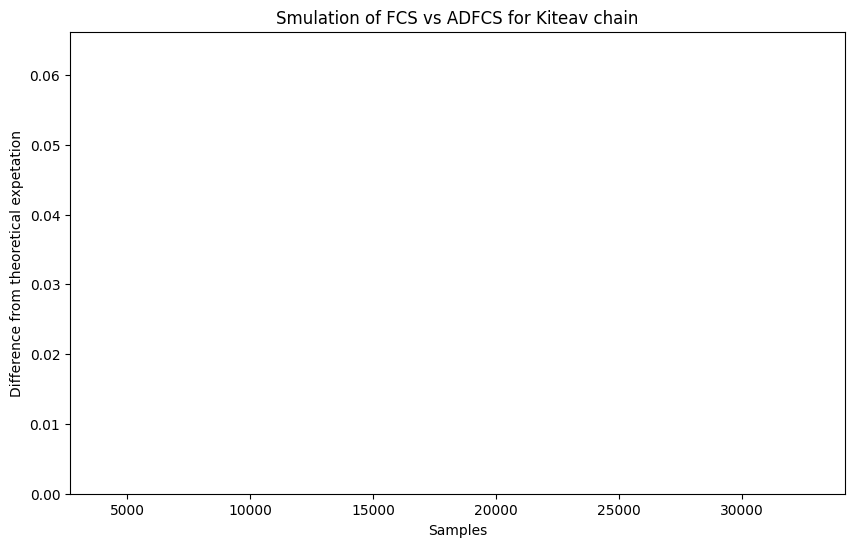

In [47]:
plot_theory_vs_fcs_adfcs_var_bar(df, 12)

<BarContainer object of 3 artists>

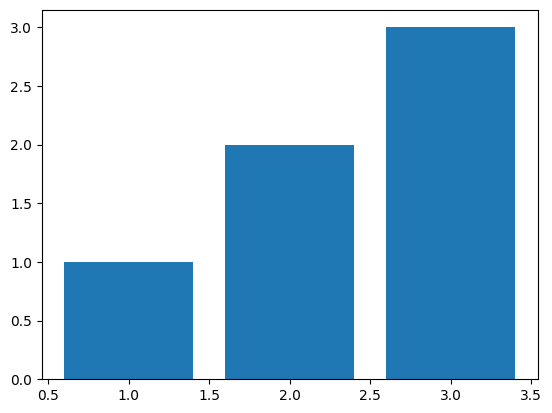

In [25]:
plt.bar([1,2,3], [1,2,3])

In [48]:
n=12

theory_pattern = re.compile(r'Theory_n=' + str(n))
fcs_mean_pattern = re.compile(r'FCS_n=' + str(n) + r'_mean')
fcs_var_pattern = re.compile(r'FCS_n=' + str(n) + r'_var')
adfcs_pattern = re.compile(r'ADFCS_n=' + str(n) + r'_d=(\d+)_(mean|var)')

# 提取数据
samples = df['Samples'].values

theory_col = next((col for col in df.columns if theory_pattern.match(col)), None)
fcs_mean_col = next((col for col in df.columns if fcs_mean_pattern.match(col)), None)
fcs_var_col = next((col for col in df.columns if fcs_var_pattern.match(col)), None)

# 分别收集ADFCS的均值和方差列
adfcs_mean_cols = {}
adfcs_var_cols = {}

for col in df.columns:
    match = adfcs_pattern.match(col)
    if match:
        d, stat_type = match.groups()
        if stat_type == 'mean':
            adfcs_mean_cols[d] = col
        elif stat_type == 'var':
            adfcs_var_cols[d] = col

# if not theory_col or not fcs_mean_col or not fcs_var_col:
#     print(f"Columns for n={n} not found.")
#     return


In [89]:
samples = [4096, 8192, 16384, 32768, 65536 ]
squeeze_fill = 5
# 计算并绘制FCS_mean与Theory的差值曲线，并加上方差阴影区
# fcs_diff = np.abs(df[fcs_mean_col] - df[theory_col])
fcs_diff = list(map(abs, df[fcs_mean_col] - df[theory_col]) )
fcs_var = df[fcs_var_col]/squeeze_fill
print(fcs_diff)

[0.06304, 0.0426025390625, 0.008056640625, 0.0089111328125, 0.0042266845703125]


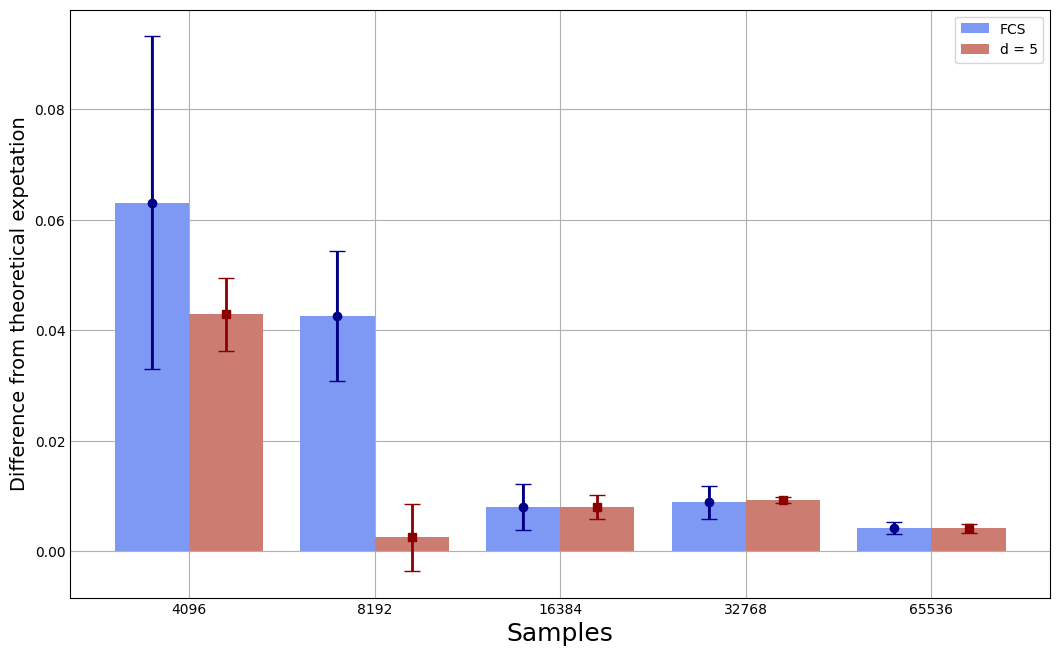

In [103]:

# 创建图表
plt.style.use('_mpl-gallery')
plt.figure(figsize=(10, 6))
width = 0.4
x = np.arange(5)
# 基准线
# plt.axhline(y=0, color='black', linestyle='-', linewidth=2, label='Theory baseline')


# print(np.array(fcs_var))
# plt.bar(["4096", "8192", "16384", "32768", "65536" ], fcs_diff)

plt.bar(x-width/2, fcs_diff, width, label='FCS', yerr=np.array(fcs_var), color=(126/255, 153/255, 244/255))
plt.errorbar(x-width/2, fcs_diff, yerr=np.array(fcs_var), fmt='o', color = 'darkblue', capsize=6, linewidth=2)

i,d = 1,'5'
mean_col = adfcs_mean_cols[d]
var_col = adfcs_var_cols[d]

adfcs_diff = list(map(abs, df[mean_col] - df[theory_col]) )
adfcs_var = df[var_col]/squeeze_fill
plt.bar(x+width/2, adfcs_diff, width, label=f'd = {d}',  color=(204/255, 124/255, 113/255))
plt.errorbar(x+width/2, adfcs_diff, yerr=np.array(adfcs_var), fmt='s', color = 'darkred', capsize=6, linewidth=2)
plt.xticks(x, ["4096", "8192", "16384", "32768", "65536" ])
# plt.title(f'Smulation of FCS vs ADFCS for Kiteav chain', fontsize=16)
plt.xlabel('Samples', fontsize=18)
plt.ylabel('Difference from theoretical expetation', fontsize=14)
plt.legend()
plt.savefig('difference.svg', format='svg', dpi=1200)
# plt.fill_between(samples, fcs_diff - np.sqrt(fcs_var), fcs_diff + np.sqrt(fcs_var),
                #  color=(126/255, 153/255, 244/255), alpha=0.2, edgecolor='none')  # 移除阴影区域的描边

# 计算并绘制ADFCS_mean与Theory的差值曲线（对于不同的d），并加上方差阴影区
# datas = set(adfcs_mean_cols).intersection(adfcs_var_cols)
# for i,d in enumerate(datas):  # 只处理既有均值又有方差的d
#     mean_col = adfcs_mean_cols[d]
#     var_col = adfcs_var_cols[d]
#     adfcs_diff = df[mean_col] - df[theory_col]
#     adfcs_var = df[var_col]/squeeze_fill

#     # print(d, f"{int(d)==5}", type(d))
#     if int(d)==5 == 5:
#         plt.plot(samples, adfcs_diff, label=f'd = {d}', linestyle='-.', color=colors[d], marker = 'o')
#         plt.fill_between(samples, adfcs_diff - np.sqrt(adfcs_var), adfcs_diff + np.sqrt(adfcs_var),
#                         color=colors[d], alpha=0.15, edgecolor='none')  # 移除阴影区域的描边
#     else:
#         plt.plot(samples, adfcs_diff, label=f'd = {d}', linestyle=':', color=colors[d], alpha = 0.4)

# 设置图表属性


In [ ]:
plt.title(f'Smulation of FCS vs ADFCS for Kiteav chain')
plt.xlabel('Samples')
plt.ylabel('Difference from theoretical expetation')

# 获取当前轴
# ax = plt.gca()
# 移除阴影区域的图例
# handles, labels = ax.get_legend_handles_labels()
# new_handles = [h for h, l in zip(handles, labels) if not isinstance(h, plt.Polygon)]
# new_labels = [l for h, l in zip(handles, labels) if not isinstance(h, plt.Polygon)]
# plt.legend(new_handles, new_labels, bbox_to_anchor=(1,0), loc='lower right')

# 调整布局以防止图例溢出
# plt.tight_layout()
# Smulation of FCS vs ADFCS for Kiteav chain
# 显示图表
plt.savefig('difference.svg', format='svg', dpi=1200)
plt.show()

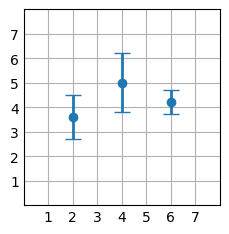

In [80]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data:
np.random.seed(1)
x = [2, 4, 6]
y = [3.6, 5, 4.2]
yerr = [0.9, 1.2, 0.5]

# plot:
fig, ax = plt.subplots()

ax.errorbar(x, y, yerr, fmt='o', linewidth=2, capsize=6)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()